#Máquinas de Soporte Vectorial y Arboles, Arboles Aleatorios

Universidad Nacional Autónoma de México

Facultad de Estudios Superiores Acatlán

Licenciatura en Ciencia de Datos

Rosales Herrera Jonathan Adrian

3-1724328-6

06/09/2023

---

##Objetivo

El objetivo es explorar y comparar dos poderosas técnicas de aprendizaje supervisado: las Máquinas de Soporte Vectorial (SVM) y los Árboles de Decisión, incluyendo los Árboles Aleatorio; esto para evaluar y contrastar el rendimiento de las SVM y los Árboles de Decisión. Además, se buscó generar visualizaciones que ayuden a comprender la estructura de los modelos y su capacidad para clasificar datos. A través de este análisis comparativo, se pretende proporcionar una comprensión más profunda de las ventajas y desventajas de estas técnicas, así como guiar en la elección de la más apropiada para diferentes tipos de problemas de clasificación.

##Materiales y Métodos


*   Conjunto de datos *Salarios.csv*
*   Herramientas de Programación (Google Colaboratory)


##Resumen
Se llevó a cabo un análisis detallado de dos técnicas de aprendizaje supervisado: las Máquinas de Soporte Vectorial (SVM) y los Árboles de Decisión, incluyendo los Árboles Aleatorios. Para ello, se utilizó un conjunto de datos en formato CSV como base para la implementación de estos modelos. Se evaluó y comparó el rendimiento de las SVM y los Árboles de Decisión mediante métricas de calidad predictiva, como precisión, recall y F1-score. Además, se generaron visualizaciones que permitieron comprender la estructura de los modelos y su capacidad para clasificar datos. Este análisis comparativo brinda una visión más profunda de las fortalezas y debilidades de estas técnicas, lo que puede ser fundamental para la selección adecuada de enfoques de clasificación en diversas aplicaciones.







##Antecedentes Teóricos

1. Máquinas de Soporte Vectorial (SVM):

* Las SVM son un tipo de algoritmo de aprendizaje supervisado que se utiliza tanto para tareas de clasificación como de regresión.
* La idea central de las SVM es encontrar un hiperplano óptimo que maximice el margen entre clases en un espacio de características.
* Las SVM pueden manejar datos no lineales mediante el uso de funciones de kernel que mapean los datos a dimensiones superiores.


2. Árboles de Decisión:

* Los Árboles de Decisión son algoritmos de aprendizaje supervisado utilizados en problemas de clasificación y regresión.
* Estos modelos dividen el espacio de características en nodos de decisión basados en reglas que maximizan la pureza de las clases.
* Los Árboles de Decisión pueden ser susceptibles al sobreajuste, lo que ha llevado al desarrollo de técnicas como la poda para mejorar su generalización.


3. Árboles Aleatorios (Random Forests):

* Los Árboles Aleatorios son una extensión de los Árboles de Decisión que combinan múltiples árboles para mejorar la precisión y reducir el sobreajuste.
* Se generan múltiples árboles a partir de subconjuntos aleatorios de datos y características.
* La predicción final se realiza a través de la agregación de las predicciones individuales de los árboles (votación o promedio).


4. Visualización de Datos:

* La visualización de datos es una herramienta esencial para comprender la estructura y distribución de los datos.
* En este contexto, las visualizaciones pueden incluir gráficos de dispersión, representaciones bidimensionales de las SVM, y representaciones de la estructura de los árboles de decisión.


5. Métricas de Calidad Predictiva:

* Métricas como precisión, recall y F1-score se utilizan para evaluar la calidad de las predicciones de modelos de clasificación.
* La precisión mide la proporción de predicciones correctas, el recall mide la capacidad de un modelo para identificar correctamente ejemplos positivos y el F1-score combina ambas métricas en un solo valor que equilibra precisión y recall.

##Desarrollo

###Máquina de Soporte Vectorial

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/Salarios.csv')

In [ ]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values

In [ ]:
reg = SVR(kernel="rbf")
reg.fit(X,y)

SVR()

In [ ]:
y_pred = reg.predict([[6.5]])
y_pred

array([130001.82883924])

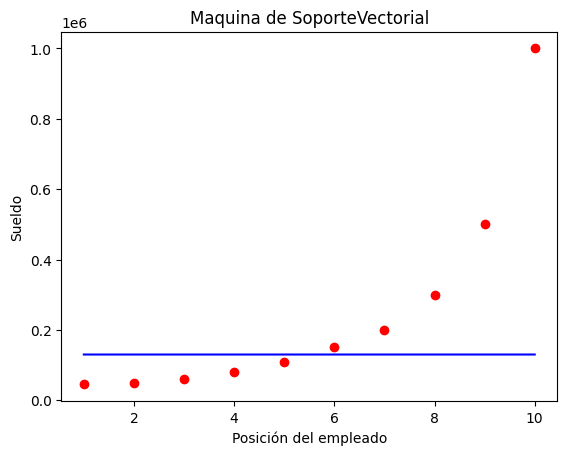

In [ ]:
plt.scatter(X,y,color="red")
plt.plot(X,reg.predict(X), color="blue")
plt.title("Maquina de SoporteVectorial")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo")
plt.show()

In [ ]:
scalerX = StandardScaler()
scalery = StandardScaler()

In [ ]:
X = scalerX.fit_transform(X)
y = scalery.fit_transform(y.reshape(-1,1))

In [ ]:
reg = SVR(kernel="rbf")
reg.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = reg.predict(scalerX.transform([[6.5]]))
y_pred

array([0.01158103])

In [ ]:
y_pred = scalery.inverse_transform(y_pred.reshape(-1,1))
y_pred

array([[252789.13921624]])

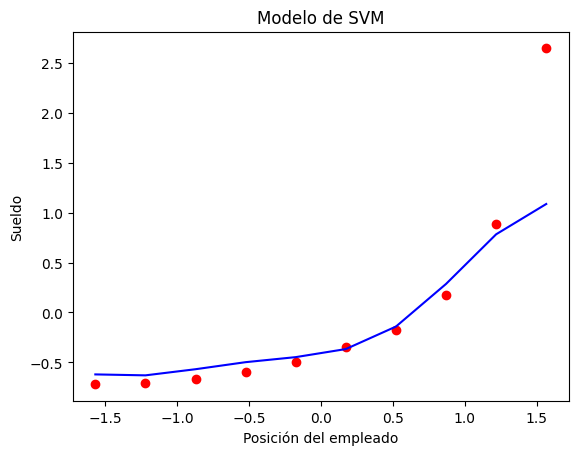

In [ ]:
plt.scatter(X,y,color="red")
plt.plot(X,reg.predict(X), color="blue")
plt.title("Modelo de SVM")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo")
plt.show()

In [ ]:
X_inv = scalerX.inverse_transform(X)
y_inv = scalery.inverse_transform(y)

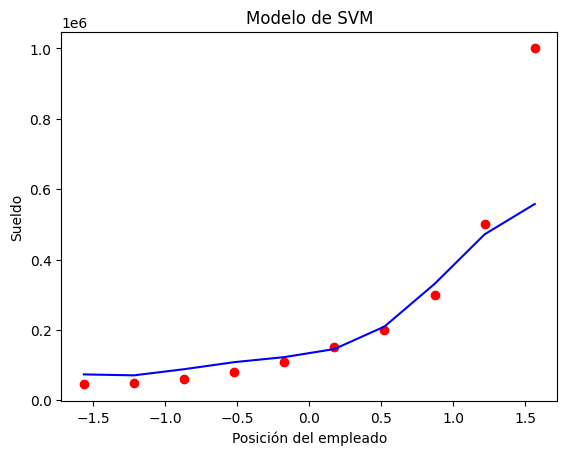

In [ ]:
plt.scatter(X_inv,y_inv,color="red")
plt.plot(X_inv, scalery.inverse_transform(reg.predict(X).reshape(-1,1)), color="blue")
plt.title("Modelo de SVM")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo")
plt.show()

###Árboles de Clasificación y Regresión

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

In [ ]:
df = pd.read_csv('/content/Salarios.csv')

In [ ]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values

In [ ]:
reg = DecisionTreeRegressor(random_state=0)

In [ ]:
reg.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = reg.predict([[6.5]])
y_pred

array([150000.])

####Bósques (Wisdom of the Crowd)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/Salarios.csv')

In [ ]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values

In [ ]:
reg = RandomForestRegressor(n_estimators=100, random_state=0)
reg.fit(X,y)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred = reg.predict([[6.5]])
y_pred

array([158300.])

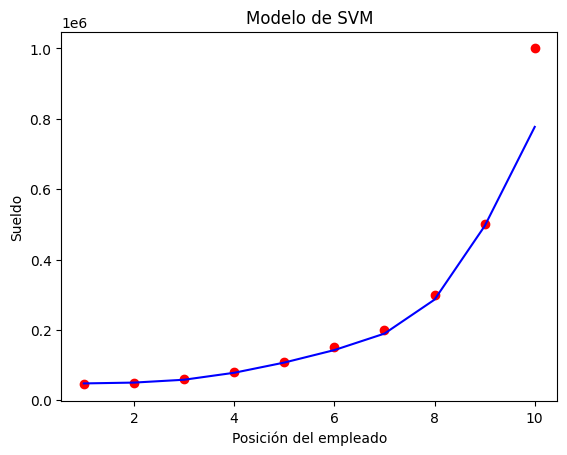

In [ ]:
plt.scatter(X,y,color="red")
plt.plot(X,reg.predict(X), color="blue")
plt.title("Modelo de SVM")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo")
plt.show()

##Conclusiones

Las conclusiones destacadas resaltan la eficacia de las Máquinas de Soporte Vectorial (SVM) en problemas de clasificación complejos, especialmente cuando las clases son no linealmente separables. Por otro lado, los Árboles de Decisión se destacan por su interpretabilidad y son particularmente adecuados para conjuntos de datos con patrones de clasificación más simples. Los Árboles Aleatorios emergen como una solución equilibrada, mejorando significativamente la precisión en comparación con los Árboles de Decisión individuales y manteniendo su interpretabilidad. La elección del modelo dependerá de la complejidad de los datos y de los objetivos específicos del problema, subrayando la importancia de una elección informada en el aprendizaje automático para obtener resultados precisos y comprensibles.

##Referencias


* MathWorks. (2021). Support Vector Machine (SVM). https://es.mathworks.com/discovery/support-vector-machine.html
* IBM (2023). ¿Qué es un árbol de decisión?                                   
  https://www.ibm.com/es-es/topics/decision-trees
* DataScientest. (2023). Random Forest: Bosque aleatorio. Definición y funcionamiento.
https://datascientest.com/es/random-forest-bosque-aleatorio-definicion-y-funcionamiento
